#Incremental Improvement - Max Flow / Min Cut

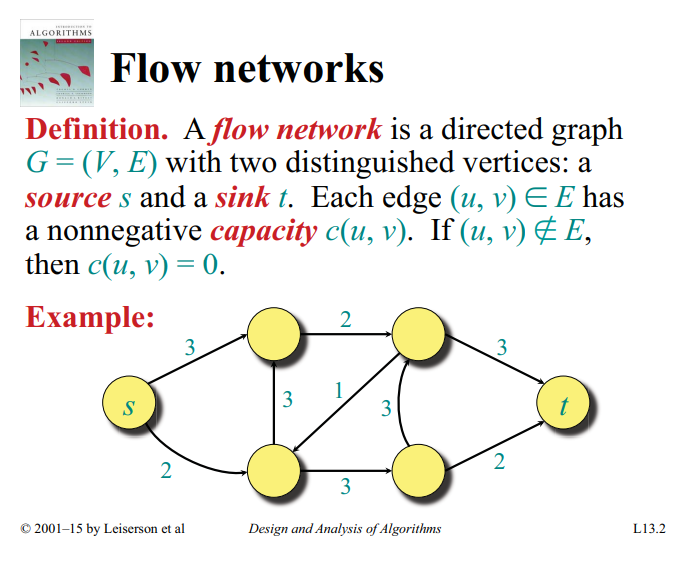

In [ ]:
class FlowNetwork:
    def __init__(self):
        self.adjacency_list = {}
        self.capacities = {}

    def add_edge(self, u, v, capacity):
        # Ensure u and v are in the adjacency list
        if u not in self.adjacency_list:
            self.adjacency_list[u] = []
        if v not in self.adjacency_list:
            self.adjacency_list[v] = []

        # Add the edge from u to v with the given capacity
        self.adjacency_list[u].append(v)
        self.capacities[(u, v)] = capacity

    def get_neighbors(self, u):
        # Return the list of neighbors of vertex u
        if u in self.adjacency_list:
            return self.adjacency_list[u]
        else:
            return []

    def get_capacity(self, u, v):
        # Return the capacity of the edge (u, v)
        return self.capacities.get((u, v), 0)

In [ ]:
# Create a new flow network
flow_network = FlowNetwork()

# Add edges to the flow network with capacities
flow_network.add_edge('s', 'a', 10)
flow_network.add_edge('s', 'b', 5)
flow_network.add_edge('a', 'c', 15)
flow_network.add_edge('b', 'c', 8)
flow_network.add_edge('b', 'd', 7)
flow_network.add_edge('c', 't', 12)
flow_network.add_edge('d', 't', 10)

# Example usage: get neighbors of a vertex and capacities of specific edges
print("Neighbors of 's':", flow_network.get_neighbors('s'))
print("Capacity from 's' to 'a':", flow_network.get_capacity('s', 'a'))
print("Capacity from 'b' to 'c':", flow_network.get_capacity('b', 'c'))

Neighbors of 's': ['a', 'b']
Capacity from 's' to 'a': 10
Capacity from 'b' to 'c': 8


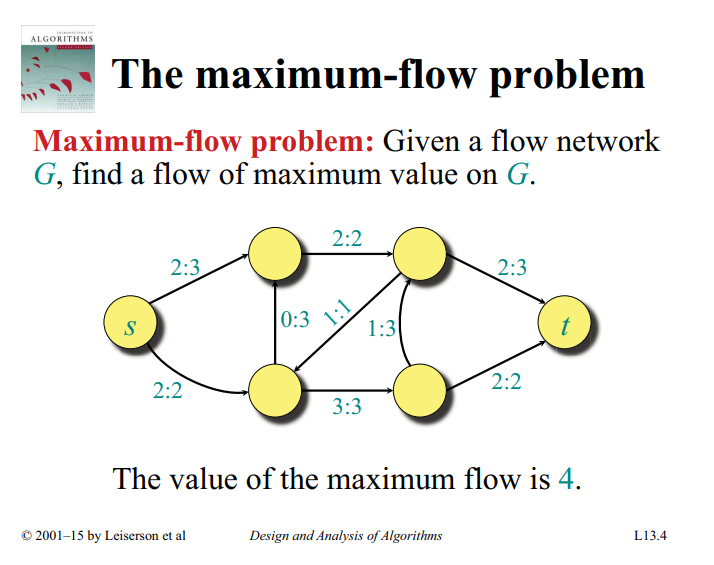

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)


Maximum Flow: 15


#Net Flow and Flow in the Sink

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

    def net_flow(self, node):
        # Calculate net flow at a given node
        net_flow = 0
        for neighbor in self.adj[node]:
            if self.capacity[(node, neighbor)] > 0:
                net_flow -= self.capacity[(node, neighbor)]
            else:
                net_flow += self.capacity[(neighbor, node)]
        return net_flow

    def flow_into_sink(self, sink):
        # Calculate total flow into the sink
        flow_into_sink = 0
        for neighbor in self.adj[sink]:
            if self.capacity[(neighbor, sink)] > 0:
                flow_into_sink += self.capacity[(neighbor, sink)]
        return flow_into_sink

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)

    # Calculate net flow at node 'C'
    node = 'C'
    net_flow_at_node = flow_network.net_flow(node)
    print(f"Net Flow at Node {node}: {net_flow_at_node}")

    # Calculate flow into the sink 'T'
    flow_into_sink = flow_network.flow_into_sink(sink)
    print(f"Flow into Sink {sink}: {flow_into_sink}")

Maximum Flow: 15
Net Flow at Node C: -10
Flow into Sink T: 10


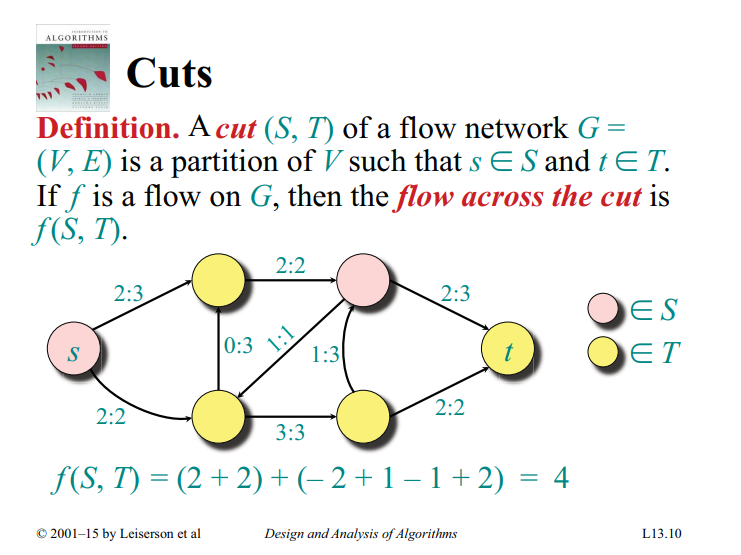

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

    def find_min_cut(self, source):
        # Perform BFS from the source to determine the reachable nodes (in S)
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()
            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)

        # All nodes in visited are in set S, others are in set T
        S = visited
        T = set(self.adj.keys()) - S  # All nodes not in S are in T

        return S, T

    def flow_across_cut(self, source, sink):
        # Compute the flow across the minimum cut (S, T) where S contains 'source'
        S, T = self.find_min_cut(source)

        # Calculate the flow across the cut (S, T)
        flow_across_cut = 0
        for u in S:
            for v in self.adj[u]:
                if v in T:  # Edge from S to T
                    flow_across_cut += self.capacity[(u, v)]

        return flow_across_cut

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)

    # Find the minimum cut (S, T) where S contains 'source'
    S, T = flow_network.find_min_cut(source)
    print("Min Cut (S, T):", S, T)

    # Calculate the flow across the minimum cut (S, T)
    flow_across_cut = flow_network.flow_across_cut(source, sink)
    print("Flow across Cut (S, T):", flow_across_cut)

Maximum Flow: 15
Min Cut (S, T): {'S'} {'A', 'D', 'B', 'T', 'C'}
Flow across Cut (S, T): 0


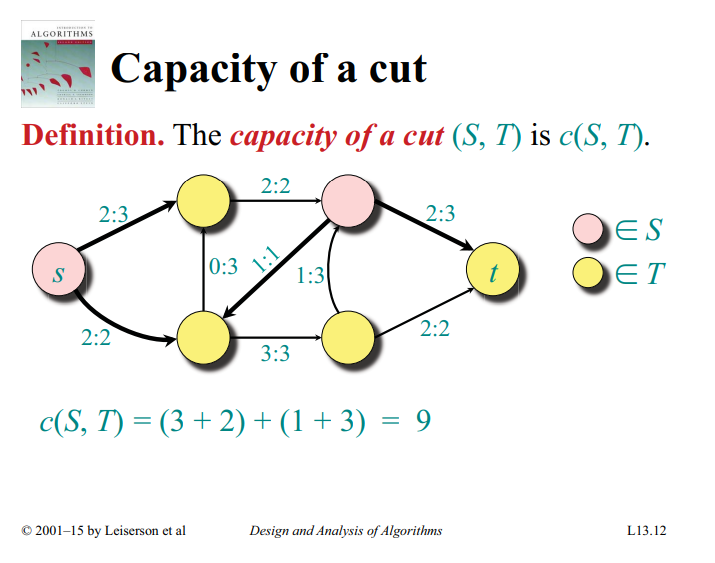

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

    def find_min_cut(self, source):
        # Perform BFS from the source to determine the reachable nodes (in S)
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()
            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)

        # All nodes in visited are in set S, others are in set T
        S = visited
        T = set(self.adj.keys()) - S  # All nodes not in S are in T

        return S, T

    def capacity_of_cut(self, S, T):
        # Calculate the capacity of the cut (S, T)
        capacity_cut = 0
        for u in S:
            for v in self.adj[u]:
                if v in T:  # Edge from S to T
                    capacity_cut += self.capacity[(u, v)]

        return capacity_cut

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)

    # Find the minimum cut (S, T) where S contains 'source'
    S, T = flow_network.find_min_cut(source)
    print("Min Cut (S, T):", S, T)

    # Calculate the capacity of the minimum cut (S, T)
    capacity_of_cut = flow_network.capacity_of_cut(S, T)
    print("Capacity of Cut (S, T):", capacity_of_cut)

Maximum Flow: 15
Min Cut (S, T): {'S'} {'A', 'D', 'B', 'T', 'C'}
Capacity of Cut (S, T): 0


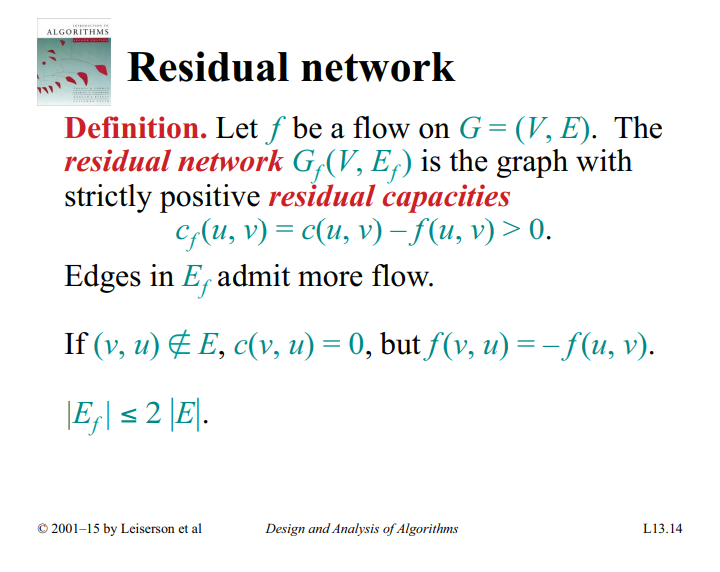

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

    def residual_network(self):
        # Create the residual network based on the current flow and capacities
        residual_network = FlowNetwork()

        for u in self.adj:
            for v in self.adj[u]:
                # Calculate residual capacity cf(u, v) = c(u, v) - f(u, v)
                residual_capacity = self.capacity[(u, v)] - self.capacity[(v, u)]

                if residual_capacity > 0:
                    residual_network.add_edge(u, v, residual_capacity)
                if residual_capacity < self.capacity[(u, v)]:
                    residual_network.add_edge(v, u, self.capacity[(u, v)] - residual_capacity)

        return residual_network

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)

    # Create the residual network G_f
    residual_network = flow_network.residual_network()

    # Print the adjacency list of the residual network G_f
    print("Residual Network G_f:")
    for u in residual_network.adj:
        for v in residual_network.adj[u]:
            residual_capacity = residual_network.capacity[(u, v)]
            print(f"{u} -> {v}, Residual Capacity: {residual_capacity}")

Maximum Flow: 15
Residual Network G_f:
A -> S, Residual Capacity: 10
A -> S, Residual Capacity: 10
A -> B, Residual Capacity: 15
A -> C, Residual Capacity: 0
A -> B, Residual Capacity: 15
A -> C, Residual Capacity: 0
S -> A, Residual Capacity: 0
S -> B, Residual Capacity: 0
S -> A, Residual Capacity: 0
S -> B, Residual Capacity: 0
B -> S, Residual Capacity: 5
B -> A, Residual Capacity: 0
B -> S, Residual Capacity: 5
B -> A, Residual Capacity: 0
B -> C, Residual Capacity: 5
B -> D, Residual Capacity: 5
B -> C, Residual Capacity: 5
B -> D, Residual Capacity: 5
C -> A, Residual Capacity: 10
C -> B, Residual Capacity: 0
C -> A, Residual Capacity: 10
C -> B, Residual Capacity: 0
C -> D, Residual Capacity: 10
C -> T, Residual Capacity: 0
C -> D, Residual Capacity: 10
C -> T, Residual Capacity: 0
D -> B, Residual Capacity: 0
D -> C, Residual Capacity: 0
D -> B, Residual Capacity: 0
D -> C, Residual Capacity: 0
D -> T, Residual Capacity: 10
D -> T, Residual Capacity: 10
T -> C, Residual Capaci

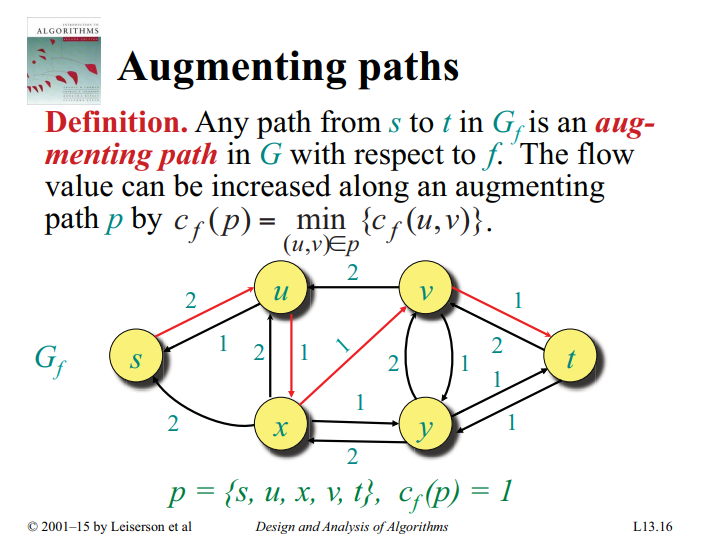

In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current
                    if neighbor == sink:
                        return True

        return False

    def edmonds_karp(self, source, sink):
        max_flow = 0
        parent = {}

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            # Trace back the path to find the minimum residual capacity
            while s != source:
                path_flow = min(path_flow, self.capacity[(parent[s], s)])
                s = parent[s]

            # Augment the flow along the path
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

    def find_augmenting_path(self, source, sink):
        # Perform BFS to find an augmenting path from source to sink in the residual network
        parent = {}
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                # Reconstruct the augmenting path
                path = []
                v = sink
                while v != source:
                    u = parent[v]
                    path.append((u, v))
                    v = u
                path.reverse()
                return path

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current

        return None

    def augment_flow(self, path):
        # Determine the maximum flow that can be pushed through the augmenting path
        path_flow = float('Inf')

        for u, v in path:
            residual_capacity = self.capacity[(u, v)]
            path_flow = min(path_flow, residual_capacity)

        # Augment the flow along the path
        for u, v in path:
            self.capacity[(u, v)] -= path_flow
            self.capacity[(v, u)] += path_flow

        return path_flow

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)

    # Find an augmenting path from source to sink
    augmenting_path = flow_network.find_augmenting_path(source, sink)

    if augmenting_path:
        print("Found Augmenting Path:", augmenting_path)
        # Augment the flow along the augmenting path
        flow_through_path = flow_network.augment_flow(augmenting_path)
        print("Flow through Augmenting Path:", flow_through_path)
    else:
        print("No Augmenting Path found from source to sink.")


Maximum Flow: 15
No Augmenting Path found from source to sink.


In [ ]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adj = defaultdict(list)  # adjacency list to store the graph
        self.capacity = {}  # capacity dictionary to store capacities of edges

    def add_edge(self, u, v, cap):
        # Add edge from u to v with capacity cap
        self.adj[u].append(v)
        self.adj[v].append(u)  # Add reverse edge for residual graph
        self.capacity[(u, v)] = cap
        self.capacity[(v, u)] = 0  # Initialize reverse edge capacity to 0

    def bfs(self, source, sink, parent):
        # Perform BFS to find a path from source to sink
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            if current == sink:
                return True

            for neighbor in self.adj[current]:
                if neighbor not in visited and self.capacity[(current, neighbor)] > 0:
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current
                    if neighbor == sink:
                        return True

        return False

    def augment_path(self, path):
        # Determine the maximum flow that can be pushed through the augmenting path
        path_flow = float('Inf')

        # Find the minimum residual capacity along the path
        for u, v in path:
            residual_capacity = self.capacity[(u, v)]
            path_flow = min(path_flow, residual_capacity)

        # Augment the flow along the path
        for u, v in path:
            self.capacity[(u, v)] -= path_flow
            self.capacity[(v, u)] += path_flow

        return path_flow

    def edmonds_karp(self, source, sink):
        max_flow = 0

        while True:
            # Use BFS to find an augmenting path
            parent = {}
            if not self.bfs(source, sink, parent):
                break

            # Reconstruct the augmenting path
            path = []
            v = sink
            while v != source:
                u = parent[v]
                path.append((u, v))
                v = u
            path.reverse()

            # Augment the flow along the path
            path_flow = self.augment_path(path)
            max_flow += path_flow

        return max_flow

# Example usage:
if __name__ == "__main__":
    # Create a flow network
    flow_network = FlowNetwork()

    # Add edges to the flow network (source, destination, capacity)
    flow_network.add_edge('S', 'A', 10)
    flow_network.add_edge('S', 'B', 5)
    flow_network.add_edge('A', 'B', 15)
    flow_network.add_edge('A', 'C', 10)
    flow_network.add_edge('B', 'C', 10)
    flow_network.add_edge('B', 'D', 5)
    flow_network.add_edge('C', 'D', 10)
    flow_network.add_edge('C', 'T', 15)
    flow_network.add_edge('D', 'T', 10)

    source = 'S'
    sink = 'T'

    # Compute the maximum flow from source to sink using Edmonds-Karp algorithm
    max_flow_value = flow_network.edmonds_karp(source, sink)
    print("Maximum Flow:", max_flow_value)


Maximum Flow: 15


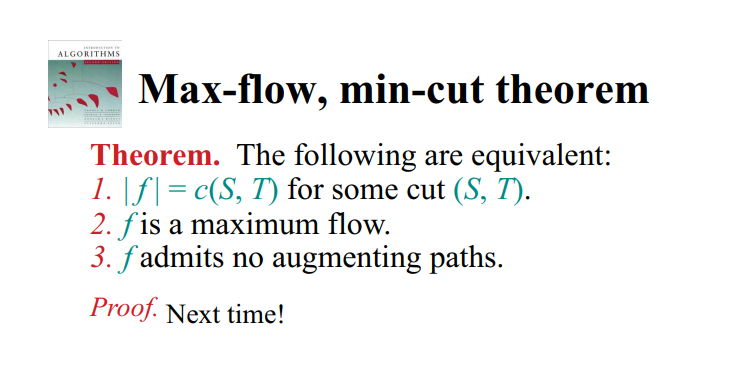

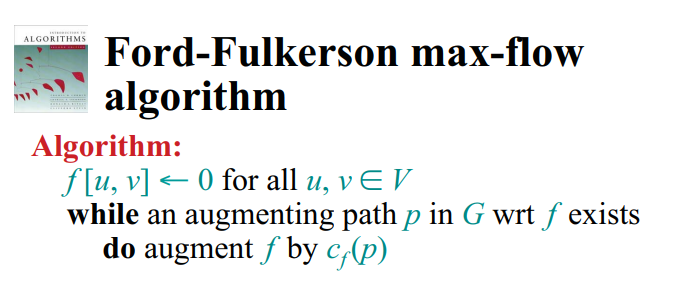

In [ ]:
from collections import defaultdict, deque

class FlowNetwork:
    def __init__(self):
        self.graph = defaultdict(dict)

    def add_edge(self, u, v, capacity):
        self.graph[u][v] = capacity
        # Initialize reverse edge with 0 capacity
        self.graph[v][u] = 0

    def bfs(self, source, sink, parent):
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            current = queue.popleft()

            for neighbor in self.graph[current]:
                if neighbor not in visited and self.graph[current][neighbor] > 0:  # Capacity > 0
                    queue.append(neighbor)
                    visited.add(neighbor)
                    parent[neighbor] = current
                    if neighbor == sink:
                        return True
        return False

    def ford_fulkerson(self, source, sink):
        parent = {}
        max_flow = 0

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Update residual capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

            max_flow += path_flow

            # Clear parent dictionary for the next BFS iteration
            parent = {}

        return max_flow

# Example usage:
if __name__ == "__main__":
    graph = FlowNetwork()
    graph.add_edge('s', 'a', 10)
    graph.add_edge('s', 'b', 5)
    graph.add_edge('a', 'b', 15)
    graph.add_edge('a', 't', 10)
    graph.add_edge('b', 't', 10)

    source = 's'
    sink = 't'

    max_flow = graph.ford_fulkerson(source, sink)
    print("Maximum Flow:", max_flow)


Maximum Flow: 15
